In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #generating graphs
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

In [2]:
#Importing DataSet 
dataset = pd.read_csv("./weather.csv")
temp= dataset['temperaturemin']
precipitation= dataset['precipitation']

In [3]:
dataset.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2011-02-13,25.0,61.0,0.00,0.0,0.0,6.93,230.0,17.90,220.0,...,No,No,No,No,No,No,No,No,No,No
1,2011-02-16,34.0,63.0,0.00,0.0,0.0,5.37,230.0,17.90,230.0,...,No,No,No,No,No,No,No,No,No,No
2,2011-02-18,52.0,78.1,0.00,0.0,0.0,10.74,230.0,17.90,280.0,...,No,No,No,Yes,No,No,No,No,No,No
3,2011-03-03,35.1,53.1,0.00,0.0,0.0,10.74,70.0,21.03,80.0,...,No,No,No,No,No,No,No,No,No,No
4,2011-03-16,46.9,64.0,0.05,0.0,0.0,2.91,270.0,10.07,300.0,...,No,No,No,No,No,No,No,No,No,No


In [4]:
df_2 = pd.DataFrame(temp, precipitation)
df_2['temperaturemax'] = dataset['temperaturemax']
df_2

,temperaturemin,temperaturemax
precipitation,,
0.00,25.0,61.0
0.00,25.0,61.0
0.00,25.0,61.0
0.00,25.0,61.0
0.05,NaN,NaN
...,...,...
0.31,NaN,NaN
0.00,25.0,61.0
0.06,NaN,NaN


In [5]:
temp

0       25.0
1       34.0
2       52.0
3       35.1
4       46.9
        ... 
4492    57.9
4493    35.1
4494    39.0
4495    61.0
4496    46.0
Name: temperaturemin, Length: 4497, dtype: float64

In [6]:
precipitation

0       0.00
1       0.00
2       0.00
3       0.00
4       0.05
        ... 
4492    0.31
4493    0.00
4494    0.06
4495    0.04
4496    0.00
Name: precipitation, Length: 4497, dtype: float64

In [7]:
x = np.array(temp).reshape(-1, 1) # function name says it : reshape the array
y = np.array(precipitation)

In [8]:
x

array([[25.],
       [34.],
       [52.],
       ...,
       [39.],
       [61.],
       [46.]])

In [9]:
y

array([0.  , 0.  , 0.  , ..., 0.06, 0.04, 0.  ])

In [10]:
#Splitting the data into Train and Test
#from sklearn.cross_validation import train_test_split in earlier version
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size=1/3, random_state=0 )

In [11]:
#Fitting simple linear regression to the Training Set
regressor = LinearRegression()
regressor.fit( xtrain, ytrain )

LinearRegression()

In [12]:
regressor.coef_ , regressor.intercept_# y = mx + c , m is coef , c is intercept

(array([0.00272922]), -0.009796835685637467)

In [14]:
xtrain

array([[35.1],
       [57. ],
       [60.1],
       ...,
       [45. ],
       [30.9],
       [46.9]])

In [13]:
actualValue = ytrain
predictedValue = regressor.predict(xtrain) 
xtrain[0], actualValue[0] , predictedValue[0]

(array([35.1]), 0.0, 0.08599882176044457)

In [14]:
regressor.coef_ * xtrain[0] + regressor.intercept_ # y = mx + c

array([0.08599882])

In [15]:
np.sqrt ( sum( abs( actualValue**2 - predictedValue**2 ) ) ) / len( xtrain ) # RMSE
# Root Mean Square Error

0.00720424776737392

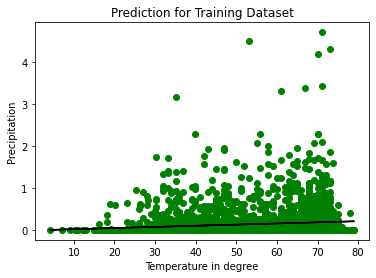

In [16]:
#Visualizing the training Test Results 
# Actual values
plt.scatter(xtrain, ytrain, color='green') # x = xtrain , y = ytrain

#Predicted values
prediction = regressor.predict(xtrain)
plt.plot(xtrain, prediction , color = 'black') # y = prediction

plt.title ("Prediction for Training Dataset")
plt.xlabel("Temperature in degree"), plt.ylabel("Precipitation")
plt.show()

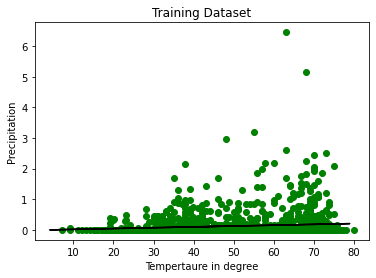

In [17]:
#Visualizing the Test Results 

plt.scatter(xtest, ytest, color= 'green')

plt.plot(xtrain, regressor.predict(xtrain), color = 'black')

plt.title ("Training Dataset")
plt.xlabel("Tempertaure in degree"), plt.ylabel("Precipitation")
plt.show()

In [18]:
d=dataset['avgwindspeed'].value_counts()

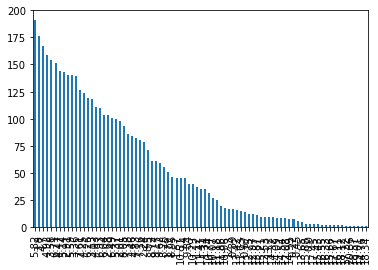

In [19]:
d.plot(kind='bar')